# Project 1B: Berkeley PM2.5

Last update: Jan 20, 2019

In [86]:
# Name: <Please put your name here>

%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Getting the data

For this part, you will have to download hourly PM2.5 data from [http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt](http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt) 


<div class="alert alert-block alert-success">
Download the data
</div>

In [2]:
# Fill code here
!wget http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt -P data/

--2019-02-01 08:43:46--  http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt
Resolving berkeleyearth.lbl.gov (berkeleyearth.lbl.gov)... 128.3.29.26
Connecting to berkeleyearth.lbl.gov (berkeleyearth.lbl.gov)|128.3.29.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 576966 (563K) [text/plain]
Saving to: `data/Bangkok.txt'

Bangkok.txt         100%[===================>] 563.44K   167KB/s    in 3.4s    

2019-02-01 08:43:51 (167 KB/s) - `data/Bangkok.txt' saved [576966/576966]



In [3]:
# Expected output

--2019-01-21 03:25:21--  http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt
Resolving berkeleyearth.lbl.gov (berkeleyearth.lbl.gov)... 128.3.29.26
Connecting to berkeleyearth.lbl.gov (berkeleyearth.lbl.gov)|128.3.29.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572783 (559K) [text/plain]
Saving to: ‘Bangkok.txt’

Bangkok.txt         100%[===================>] 559.36K   227KB/s    in 2.5s    

2019-01-21 03:25:24 (227 KB/s) - ‘Bangkok.txt’ saved [572783/572783]



## Create DataFrame

<div class="alert alert-block alert-success">
Create a dataframe from the data as shown below
</div>

In [87]:
# Fill code here
df_raw = pd.read_csv('data/Bangkok.csv', 
                 delimiter = '\t',
                 skiprows=10,
                 names = ["year", "month", "day", "utc_hour", "pm2.5", "pm10_mask", "retrospective"])

df_raw.head()

,year,month,day,utc_hour,pm2.5,pm10_mask,retrospective
0,2016,3,3,8,62.9,1.0,0
1,2016,3,3,9,62.9,1.0,0
2,2016,3,3,10,55.5,1.0,0
3,2016,3,3,11,55.5,1.0,0
4,2016,3,3,12,47.9,1.0,0


In [18]:
# Expected output

,year,month,day,utc_hour,pm2.5,pm10_mask,retrospective
0,2016,3,3,8,62.9,1.0,0
1,2016,3,3,9,62.9,1.0,0
2,2016,3,3,10,55.5,1.0,0
3,2016,3,3,11,55.5,1.0,0
4,2016,3,3,12,47.9,1.0,0


<div class="alert alert-block alert-success">
Index the dataframe with datetime
</div>

In [327]:
# Fill code here

df_raw["hour"] = df_raw['utc_hour']
df_raw["time"] = pd.to_datetime(df_raw[['month', 'day', 'year', 'hour']])
# df_raw = df_raw.drop(columns=['hour'])
df_raw["timestamp"] = df_raw["time"]
df = df_raw.set_index("time")
df.head()

,year,month,day,utc_hour,pm2.5,pm10_mask,retrospective,hour,timestamp
time,,,,,,,,,
2016-03-03 08:00:00,2016,3,3,8,62.9,1.0,0,8,2016-03-03 08:00:00
2016-03-03 09:00:00,2016,3,3,9,62.9,1.0,0,9,2016-03-03 09:00:00
2016-03-03 10:00:00,2016,3,3,10,55.5,1.0,0,10,2016-03-03 10:00:00
2016-03-03 11:00:00,2016,3,3,11,55.5,1.0,0,11,2016-03-03 11:00:00
2016-03-03 12:00:00,2016,3,3,12,47.9,1.0,0,12,2016-03-03 12:00:00


In [28]:
# Expected output

,year,month,day,utc_hour,pm2.5,pm10_mask,retrospective
2016-03-03 08:00:00,2016,3,3,8,62.9,1.0,0
2016-03-03 09:00:00,2016,3,3,9,62.9,1.0,0
2016-03-03 10:00:00,2016,3,3,10,55.5,1.0,0
2016-03-03 11:00:00,2016,3,3,11,55.5,1.0,0
2016-03-03 12:00:00,2016,3,3,12,47.9,1.0,0


<div class="alert alert-block alert-success">
Plot a line chart of PM2.5 over time
</div>

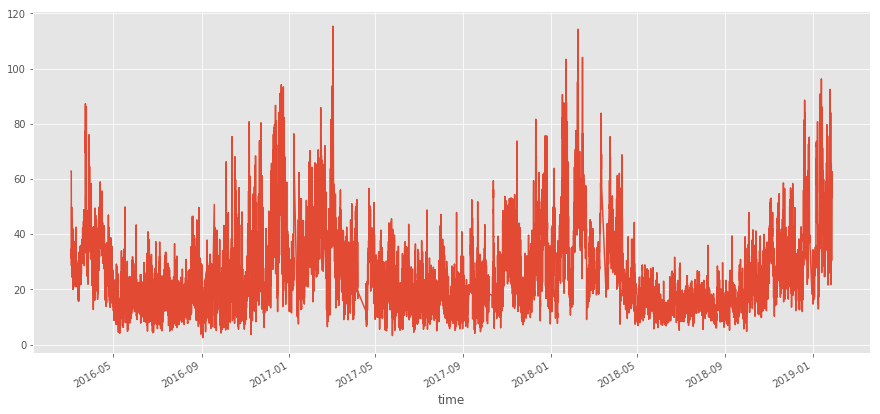

In [89]:
# Fill code here

plt.figure(figsize=(15,7))
df["pm2.5"].plot()

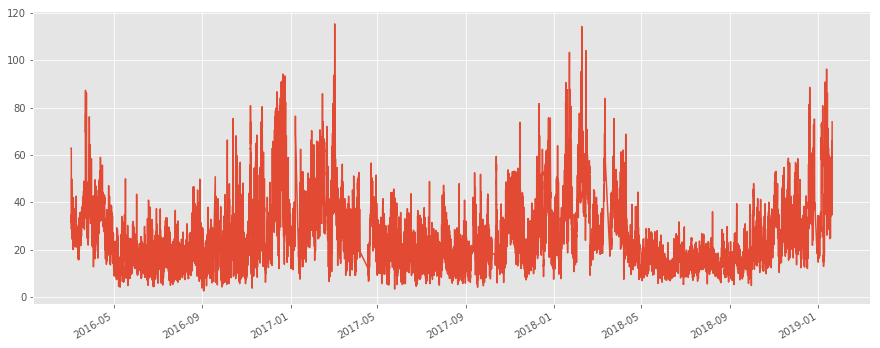

In [31]:
# Expected output

### Answer the following questions 

In this part, you must answer the following questions and present evidence from the data in the form of charts or tables.



<div class="alert alert-block alert-success">
Which month has the highest level of PM2.5 on average?
</div>

In [191]:
df_pm_month = df.groupby('month')['pm2.5'].mean()
df_pm_month.sort_values().tail()

month
11    28.799610
3     34.001534
12    37.274720
1     37.380992
2     41.013382
Name: pm2.5, dtype: float64

In [102]:
'Month %d has avg PM2.5 level at %d' % (df_pm_month.idxmax(), df_pm_month.max())

'Month 2 has avg PM2.5 level at 41'

<div class="alert alert-block alert-success">
What time of day has the highest level of PM2.5 on average?
</div>

In [190]:
df_pm_time = df.groupby('utc_hour')['pm2.5'].mean()
df_pm_time.sort_values().tail()

utc_hour
16    26.940260
3     27.084296
18    27.231102
17    27.515556
2     27.850468
Name: pm2.5, dtype: float64

In [105]:
'At %d has avg PM2.5 level at %d' % (df_pm_time.idxmax(), df_pm_time.max())

'At 2 has avg PM2.5 level at 27'

<div class="alert alert-block alert-success">
Compare the level of PM2.5 during daytime and nighttime.
</div>

In [125]:
df_pm_day = df[(df['utc_hour'] >= 6) & (df['utc_hour'] < 18)]
df_pm_day['pm2.5'].mean()

24.974610737683992

In [127]:
df_pm_night = df[(df['utc_hour'] < 6) | (df['utc_hour'] >= 18)]
df_pm_night['pm2.5'].mean()

25.87864530349271

Level of PM2.5 is higher at night

## Investigate your own questions

In this part, you will come up with hypotheses/questions and then answer them using the summary statistics or visualization.

### Your question #1
<div class="alert alert-block alert-success">
Level of PM2.5 increases every year
</div>

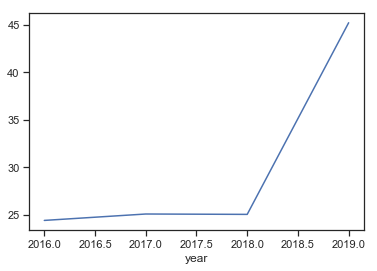

In [338]:
# Your answer
df_pm_year = df.groupby('year')['pm2.5'].mean()
df_year = pd.DataFrame(df_pm_year)
df_year["pm2.5"].plot()

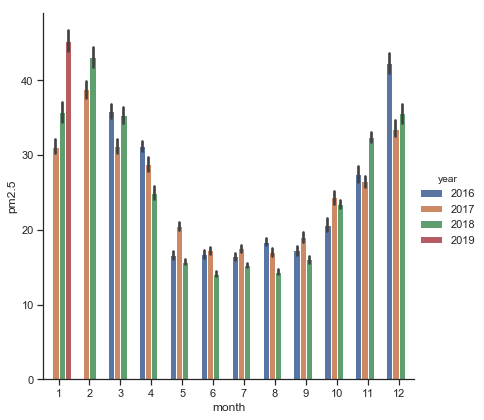

In [340]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.catplot(x="month", y="pm2.5", hue="year", kind="bar", data=df, height=6);

<div class="alert alert-block alert-warning">
Cannot conclude T^T
<li>do not have enough data for 2019</li>
<li>need more data (~10 years)</li>
</div>

### Your question #2
<div class="alert alert-block alert-success">
Winter is the season that has hightest level of PM2.5
</div>

In [179]:
df_pm_hot = df[(df['month'] >= 3) & (df['month'] <= 6)]
df_pm_avg_hot = df_pm_hot.groupby('day')['pm2.5'].mean()
df_pm_avg_hot.head(2)

day
1    23.363636
2    24.192218
Name: pm2.5, dtype: float64

In [181]:
df_pm_monsoon = df[(df['month'] >= 7) & (df['month'] <= 10)]
df_pm_avg_monsoon = df_pm_monsoon.groupby('day')['pm2.5'].mean()
df_pm_avg_monsoon.head(2)

day
1    17.133099
2    17.203571
Name: pm2.5, dtype: float64

In [182]:
df_pm_winter = df[(df['month'] > 10) | (df['month'] < 3)]
df_pm_avg_winter = df_pm_winter.groupby('day')['pm2.5'].mean()
df_pm_avg_winter.head(2)

day
1    28.832400
2    30.475097
Name: pm2.5, dtype: float64

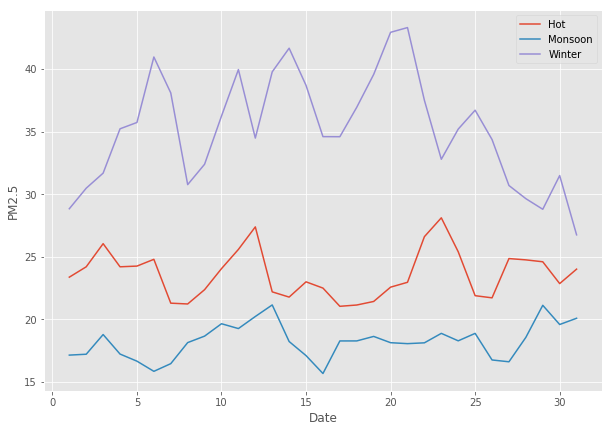

In [189]:
# Your answer
plt.figure(figsize=(10,7))
plt.plot(df_pm_avg_hot, label='Hot')
plt.plot(df_pm_avg_monsoon, label='Monsoon')
plt.plot(df_pm_avg_winter, label='Winter')

# Add legend
plt.legend(loc='upper right')

# Add title and x, y labels
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()

### Your question #3
<div class="alert alert-block alert-success">
During morning and evening PM2.5 should be hight because it is the time people travel a lot
    <li>Go to work/school</li>
    <li>Go back home</li>
    <li>Hang out</li>
</div>

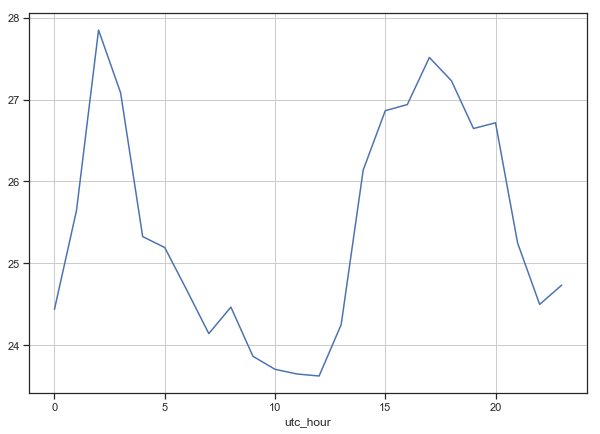

In [325]:
# Your answer
df_2t = df.groupby("utc_hour").mean()
plt.figure(figsize=(10,7))
df_2t["pm2.5"].plot()
plt.grid(True)

<div class="alert alert-block alert-danger">
It peaks at 3AM
<li>Go back after a night out??</li>
Then PM2.5 level on <b>Fri, Sat and Sun</b> night must be high
--> 12AM until 5 AM of <b>Sat, Sun and Mon</b>
</div>

In [374]:
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['weekday'] = df['timestamp'].dt.weekday_name

df.head()

,year,month,day,utc_hour,pm2.5,pm10_mask,retrospective,hour,timestamp,weekday,day_of_week
time,,,,,,,,,,,
2016-03-03 08:00:00,2016,3,3,8,62.9,1.0,0,8,2016-03-03 08:00:00,Thursday,3
2016-03-03 09:00:00,2016,3,3,9,62.9,1.0,0,9,2016-03-03 09:00:00,Thursday,3
2016-03-03 10:00:00,2016,3,3,10,55.5,1.0,0,10,2016-03-03 10:00:00,Thursday,3
2016-03-03 11:00:00,2016,3,3,11,55.5,1.0,0,11,2016-03-03 11:00:00,Thursday,3
2016-03-03 12:00:00,2016,3,3,12,47.9,1.0,0,12,2016-03-03 12:00:00,Thursday,3


In [383]:
df_night = df[(df['utc_hour'] > 0) & (df['utc_hour'] <= 5)]
df_weekday_night = df_night.groupby('weekday').mean()
df_weekday_night['pm2.5']

weekday
Friday       25.511715
Monday       27.096756
Saturday     25.381197
Sunday       25.696716
Thursday     26.667225
Tuesday      26.134406
Wednesday    26.944886
Name: pm2.5, dtype: float64

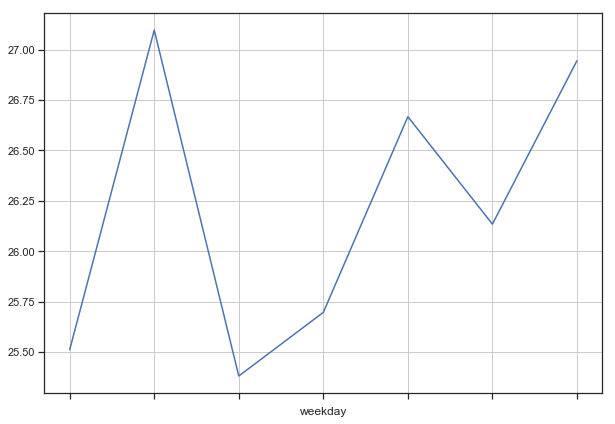

In [384]:
plt.figure(figsize=(10,7))
df_weekday_night["pm2.5"].plot()
plt.grid(True)
#      Sun      Mon      Tue       Wed       Thu       Fri        Sat